#  Description

* Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

* The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

* While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

* To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

**Help save them and change history!**

##  Task
* Our task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

##  File and Data Field Descriptions
* train.csv :
Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

> * `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

> * `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

> * `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

> * `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for *Port* or `S` for *Starboard*.

> * `Destination` - The planet the passenger will be debarking to.

> * `Age` - The age of the passenger.

> * `VIP` - Whether the passenger has paid for special VIP service during the voyage. `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

> * `Name` - The first and last names of the passenger.

> * `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - 
Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## Evaluation
> Our Problem will evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

<img src="./imgs/accy.png" alt="acc"/>

In [52]:
# import our Tools

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, f1_score, recall_score, precision_score

from sklearn.preprocessing import LabelEncoder

## Exploring Data Analysis (EDA)


In [77]:
# import our Data
train_df = pd.read_csv('./data/spaceship-titanic/train.csv')
test_df = pd.read_csv('./data/spaceship-titanic/test.csv')

In [54]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [55]:
# check how many True/False Value in our Data
train_df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

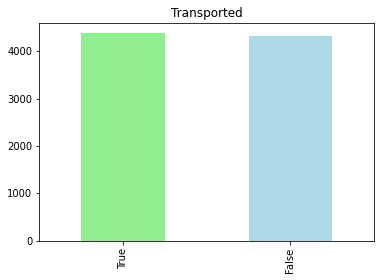

In [56]:
# visualize the target valuse
train_df['Transported'].value_counts().plot(kind="bar", color=["lightgreen", "lightblue"], title="Transported");

In [58]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 653.7+ KB


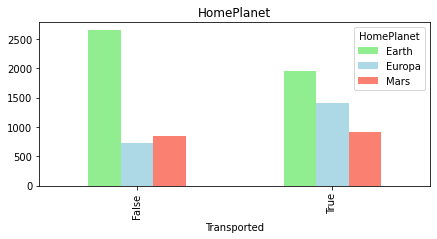

In [60]:
pd.crosstab(train_df.Transported, train_df.HomePlanet).plot(kind="bar",
                                    figsize=(7,3), 
                                    title = 'HomePlanet',
                                    color=["lightgreen", "lightblue", 'salmon']);


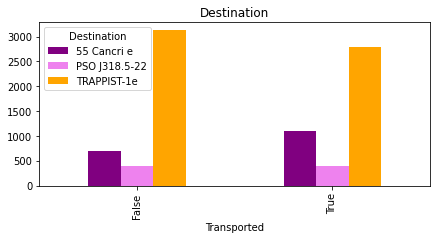

In [61]:

pd.crosstab(train_df.Transported, train_df.Destination).plot(kind="bar", 
                                    figsize=(7,3),
                                    title = 'Destination',
                                    color=["purple", "violet", 'orange']);


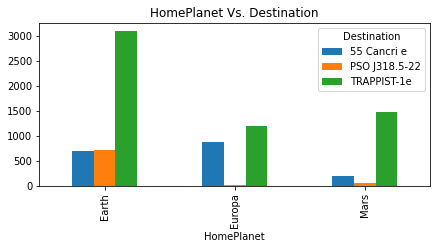

In [62]:

pd.crosstab(train_df.HomePlanet, train_df.Destination).plot(kind="bar", 
                                    figsize=(7,3),
                                    title = 'HomePlanet Vs. Destination',
                                    );


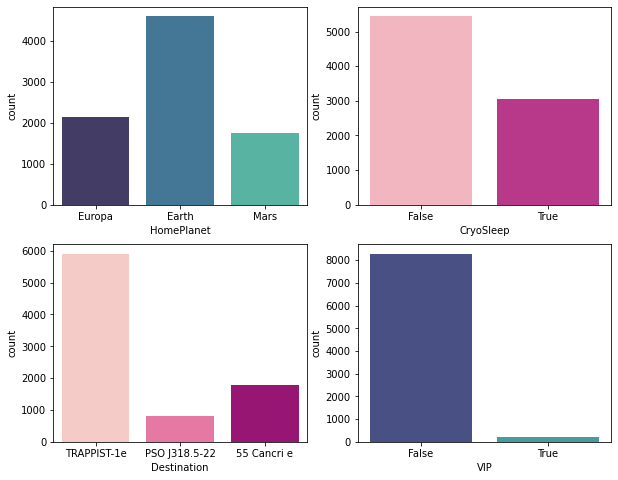

In [63]:
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(2,2, figsize=(10,8))
sns.countplot(train_df['HomePlanet'] , palette='mako', ax=ax[0][0])
sns.countplot(train_df['CryoSleep'] , palette='RdPu', ax=ax[0][1])
sns.countplot(train_df['Destination'] ,palette='RdPu', ax=ax[1][0])
sns.countplot(train_df['VIP'] , palette='mako', ax=ax[1][1])
plt.show()


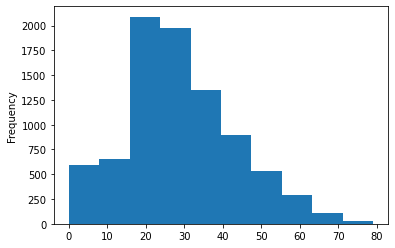

In [64]:
train_df.Age.plot.hist();

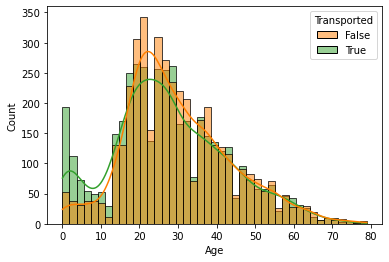

In [65]:
sns.histplot(x=train_df.Age , hue=train_df.Transported, palette='Paired_r',kde=True)
plt.show()


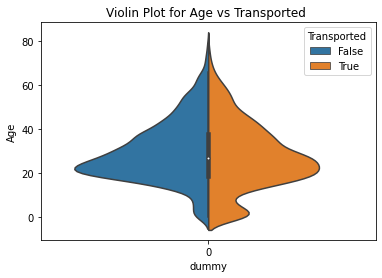

In [66]:
train_df['dummy'] = 0 #dummy variable is required when we want to plot hue without any x axis variable 
                      #that is only two variable in plot instead of 3 (x,y,hue)
sns.violinplot(y='Age' ,x='dummy',hue ='Transported' , data = train_df,split=True).set_title('Violin Plot for Age vs Transported ')
plt.show()
train_df.drop(columns=['dummy'], inplace=True)

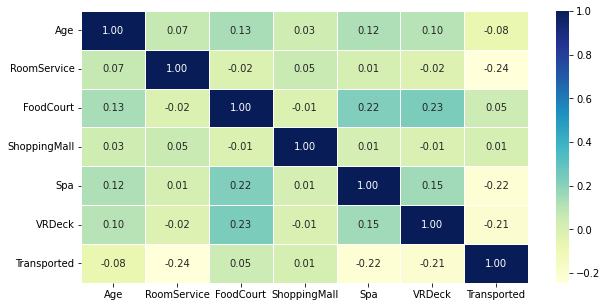

In [67]:
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");


## Modeling

In [74]:
train_data = train_df.copy()

In [75]:
def process_columns(df):
    #Splitting Columns
    df[['GroupNum','Group_Id']] =df['PassengerId'].str.split('_', expand=True)

    df[['deck','num','side']] = df['Cabin'].str.split('/', expand=True)
    df.drop(columns=["Name","Cabin", "PassengerId"], inplace=True)
    return df

In [78]:
train_df = process_columns(train_df)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum,Group_Id,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


In [79]:
# These columns contain strings
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
GroupNum
Group_Id
deck
num
side


In [80]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [88]:
# Transfer string columns into Categorgy
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        train_df[label] = content.astype("category").cat.as_ordered()

In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8476 non-null   category
 2   Destination   8511 non-null   category
 3   Age           8514 non-null   float64 
 4   VIP           8490 non-null   category
 5   RoomService   8512 non-null   float64 
 6   FoodCourt     8510 non-null   float64 
 7   ShoppingMall  8485 non-null   float64 
 8   Spa           8510 non-null   float64 
 9   VRDeck        8505 non-null   float64 
 10  Transported   8693 non-null   bool    
 11  GroupNum      8693 non-null   category
 12  Group_Id      8693 non-null   category
 13  deck          8494 non-null   category
 14  num           8494 non-null   category
 15  side          8494 non-null   category
dtypes: bool(1), category(9), float64(6)
memory usage: 639.1 KB


In [90]:
# Check for which numeric columns have null values
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label+ f" | median = {train_df[label].median()}| mean = {train_df[label].mean()}")

Age | median = 27.0| mean = 28.82793046746535
RoomService | median = 0.0| mean = 224.687617481203
FoodCourt | median = 0.0| mean = 458.07720329024676
ShoppingMall | median = 0.0| mean = 173.72916912197996
Spa | median = 0.0| mean = 311.1387779083431
VRDeck | median = 0.0| mean = 304.8547912992357


### Filling  values 


In [91]:
def process_df(df, nonumaric=False):
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
        if nonumaric == True:
            if not pd.api.types.is_numeric_dtype(content):
                df[label] = pd.Categorical(content).codes+1    
    return df

In [94]:
proc_df = process_df(train_df, True)

In [95]:
proc_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
GroupNum        0
Group_Id        0
deck            0
num             0
side            0
dtype: int64

In [96]:
proc_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNum,Group_Id,deck,num,side
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,False,1,1,2,1,1
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,True,2,1,6,1,2


### Modeling



In [97]:
X = proc_df.drop(columns=["Transported"])
y = proc_df["Transported"]

In [98]:
np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [99]:

models = {"Gradient Boosting Classifier": GradientBoostingClassifier(),
          "KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Bagging Classifier": BaggingClassifier(),
          "SVC":SVC()
         }
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Make a list to keep model scores
    Model_Name = []
    model_scores = []
    F1 = []
    Rec = []
    Per = []
    AUC =[]
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        Model_Name.append(name)
        y_preds = model.predict(X_test)
        f1 = f1_score(y_test, y_preds)
        recall = recall_score(y_test, y_preds)
        precision = precision_score(y_test, y_preds)
        Auc = auc(y_test, y_preds)
        F1.append(f1)
        Rec.append(recall)
        Per.append(precision)
        AUC.append(Auc/1000)
        # Evaluate the model and append its score to model_scores
        model_scores.append(model.score(X_test, y_test))
    dt = {
        "Model name" : Model_Name,
        "model_scores": model_scores,
        "F1": F1,
        "Rec": Rec,
        "Per": Per,
        "AUC": AUC
    }
    return dt

In [100]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [101]:
Scores = (pd.DataFrame(model_scores, index=np.arange(len(model_scores['Model name']))))
Scores

,Model name,model_scores,F1,Rec,Per,AUC
0,Gradient Boosting Classifier,0.818391,0.826374,0.844944,0.808602,0.1935
1,KNN,0.782759,0.787402,0.786517,0.788288,0.1840
2,Logistic Regression,0.811494,0.829167,0.894382,0.772816,0.2055
3,Bagging Classifier,0.795402,0.786058,0.734831,0.844961,0.1685
4,SVC,0.808046,0.829766,0.914607,0.759328,0.2095


In [102]:
dfm = Scores.drop(columns=["AUC"]).melt('Model name')
dfm

,Model name,variable,value
0,Gradient Boosting Classifier,model_scores,0.818391
1,KNN,model_scores,0.782759
2,Logistic Regression,model_scores,0.811494
3,Bagging Classifier,model_scores,0.795402
4,SVC,model_scores,0.808046
5,Gradient Boosting Classifier,F1,0.826374
6,KNN,F1,0.787402
7,Logistic Regression,F1,0.829167
8,Bagging Classifier,F1,0.786058
9,SVC,F1,0.829766


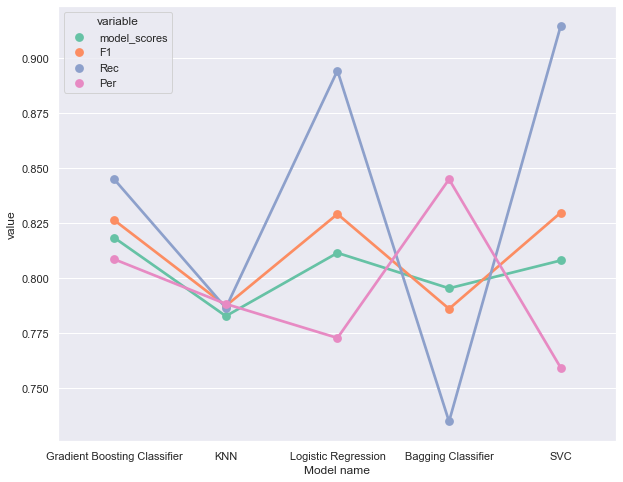

In [103]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.pointplot(x="Model name", y="value", hue='variable', data=dfm,palette="Set2");


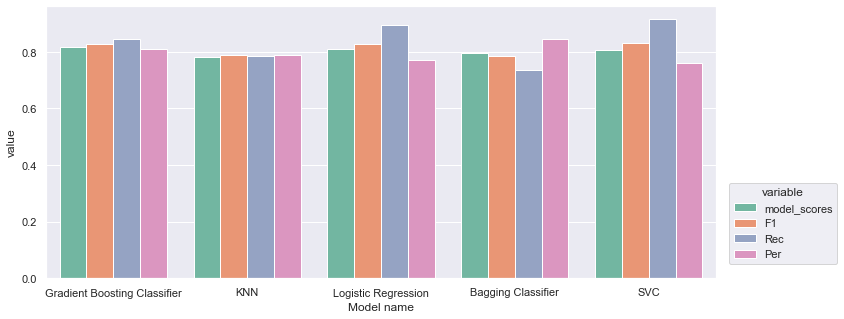

In [104]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.barplot(x="Model name", y="value", hue='variable', data=dfm,palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 0.35), loc='upper left', borderaxespad=0, title="variable");

In [105]:
print(classification_report(y_test,GradientBoostingClassifier().fit(X_train,y_train).predict(X_test)))

              precision    recall  f1-score   support

       False       0.83      0.79      0.81       425
        True       0.81      0.84      0.83       445

    accuracy                           0.82       870
   macro avg       0.82      0.82      0.82       870
weighted avg       0.82      0.82      0.82       870



In [106]:
print(classification_report(y_test,LogisticRegression().fit(X_train,y_train).predict(X_test)))

              precision    recall  f1-score   support

       False       0.87      0.72      0.79       425
        True       0.77      0.89      0.83       445

    accuracy                           0.81       870
   macro avg       0.82      0.81      0.81       870
weighted avg       0.82      0.81      0.81       870



* We see that `GradientBoostingClassifier` is more accurate , so we are going to use it in our prediction

## Hyperparameter tuning and cross-validation 


In [107]:
%%time
rand_param = { 
    "n_estimators" : [100, 200, 300],
    "max_features" : [1, 3, 5] 
    }

GBC = GridSearchCV(GradientBoostingClassifier(),
                          param_grid=rand_param,
                          cv=2,
                          verbose=True)
GBC.fit(X_train, y_train)
print(GBC.best_params_)
print(GBC.score(X_test, y_test))


Fitting 2 folds for each of 9 candidates, totalling 18 fits
{'max_features': 3, 'n_estimators': 200}
0.8126436781609195
CPU times: total: 32.8 s
Wall time: 34.4 s


In [108]:
print(classification_report(y_test,GBC.predict(X_test)))

              precision    recall  f1-score   support

       False       0.83      0.78      0.80       425
        True       0.80      0.85      0.82       445

    accuracy                           0.81       870
   macro avg       0.81      0.81      0.81       870
weighted avg       0.81      0.81      0.81       870



In [109]:
%%time
rand_param = { 
    "C" : [1.0, .5, 1.5, 2.0]
    }

Lr = GridSearchCV(LogisticRegression(),
                          param_grid=rand_param,
                          cv=2,
                          verbose=True)
Lr.fit(X_train, y_train)
print(Lr.best_params_)
print(Lr.score(X_test, y_test))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'C': 1.5}
0.8137931034482758
CPU times: total: 4.12 s
Wall time: 4.04 s


In [110]:
print(classification_report(y_test,Lr.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.71      0.79       425
        True       0.77      0.91      0.83       445

    accuracy                           0.81       870
   macro avg       0.83      0.81      0.81       870
weighted avg       0.82      0.81      0.81       870



### Evaluating

In [111]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_estimators
N_estimators = range(100, 1000, 100) 

# Setup algorithm
gbc = GradientBoostingClassifier()

# Loop through different neighbors values
for i in N_estimators:
    gbc.set_params(n_estimators = i) # set neighbors value
    
    # Fit the algorithm
    gbc.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(gbc.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(gbc.score(X_test, y_test)) 

Maximum GradientBoostingClassifier score on the test data: 82.07%


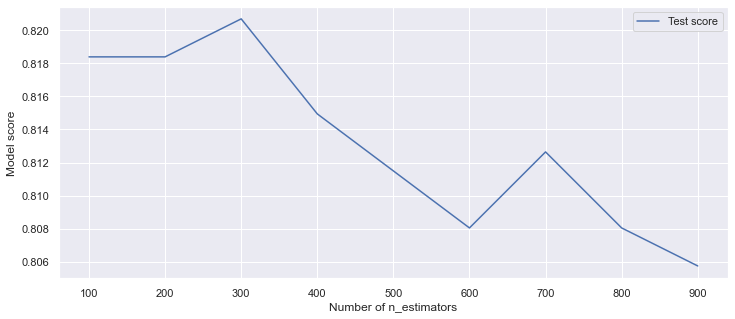

In [112]:
plt.Figure(figsize=(8, 5))
plt.plot(N_estimators, test_scores, label="Test score")
plt.xticks(np.arange(100, 1000, 100))
plt.xlabel("Number of n_estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum GradientBoostingClassifier score on the test data: {max(test_scores)*100:.2f}%")

In [114]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_estimators
C = range(1, 10, 1) 

# Setup algorithm
lr = LogisticRegression()

# Loop through different neighbors values
for i in C:
    lr.set_params(C = i) # set neighbors value
    
    # Fit the algorithm
    lr.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(lr.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(lr.score(X_test, y_test)) 

Maximum LogisticRegression score on the test data: 81.49%


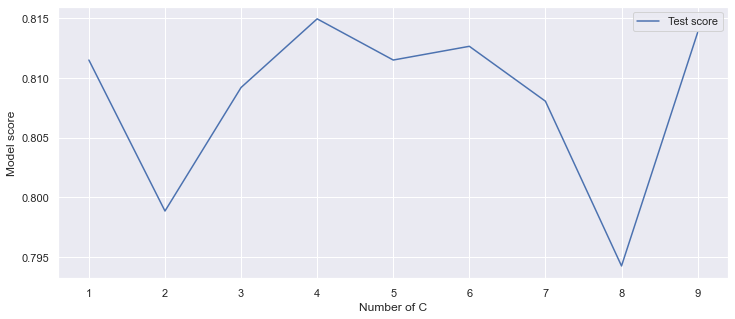

In [116]:
plt.Figure(figsize=(8, 5))
plt.plot(C, test_scores, label="Test score")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of C")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum LogisticRegression score on the test data: {max(test_scores)*100:.2f}%")

In [117]:
# Make preidctions on test data
y_preds = GBC.predict(X_test)

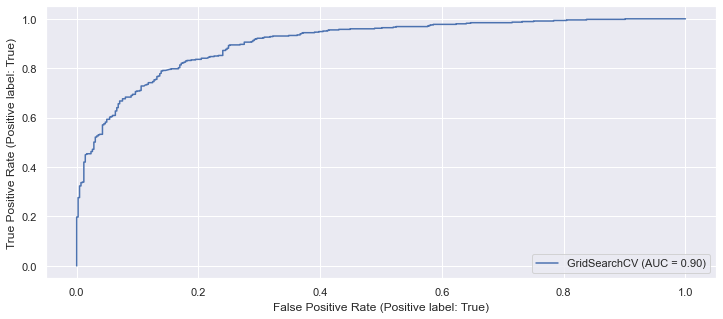

In [118]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve
plt.Figure(figsize=(7, 5))
# Plot ROC curve and calculate AUC metric
plot_roc_curve(GBC, X_test, y_test);

In [119]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds)/100)

[[3.3  0.95]
 [0.68 3.77]]


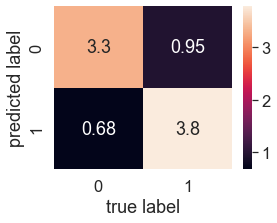

In [120]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds)/100,
                     annot=True, # Annotate the boxes
                     )
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

#### confusion matrix / 100

In [121]:
f1 = f1_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
acc = GBC.score(X_test, y_test)
f1, recall, precision, acc

(0.822246455834242, 0.8471910112359551, 0.798728813559322, 0.8126436781609195)

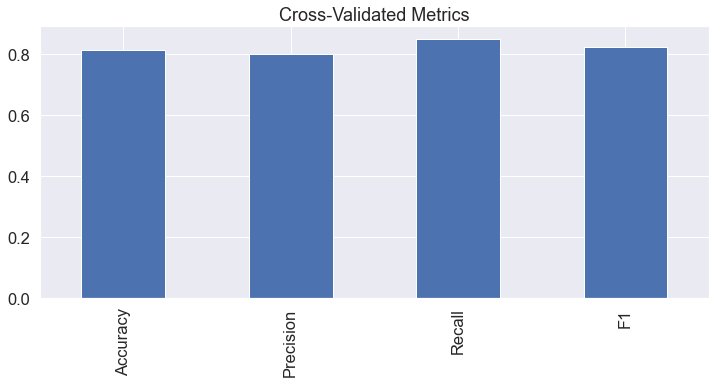

In [122]:
# Visualizing cross-validated metrics
plt.Figure(figsize=(4, 5))
GBC_metrics = pd.DataFrame({"Accuracy": acc,
                            "Precision": precision,
                            "Recall": recall,
                            "F1": f1},
                          index=[0])
GBC_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

In [123]:
GBC.best_params_

{'max_features': 3, 'n_estimators': 200}

In [124]:
model = GradientBoostingClassifier(max_features=3,n_estimators=200).fit(X_train, y_train);

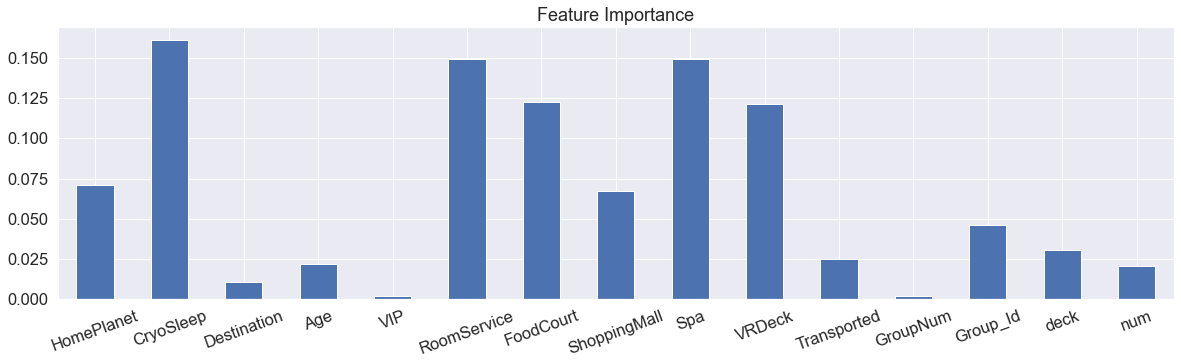

In [125]:

# Match features to columns
features_dict = dict(zip(train_df.columns, list(model.feature_importances_)))
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance",figsize=(20,5), legend=False, rot=20);

In [129]:
test_df = pd.read_csv('./data/spaceship-titanic/test.csv')
testDF = test_df.copy()
test_df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning


In [130]:
test_df = process_columns(test_df)
test_df = process_df(test_df, True)
test_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNum,Group_Id,deck,num,side
0,1,2,3,27.0,1,0.0,0.0,0.0,0.0,0.0,1,1,7,821,2


In [131]:
answer = model.predict(test_df)
answer.shape

(4277,)

In [136]:
data = pd.DataFrame({"PassengerId":pd.read_csv('./data/spaceship-titanic/test.csv')["PassengerId"],
                     "Transported":answer})

### Save our submision

In [137]:
data.to_csv("submit.csv",columns=["PassengerId","Transported"], index=False)

In [134]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model,f'models\gbc-{model.score(X_test, y_test)}.pkl')

['models\\gbc-0.8264367816091954.pkl']

## Check in kaggle

<img src="./submitscore.png" alt="submit"/>